# triangulation_3D.py

https://matplotlib.org/3.1.0/gallery/mplot3d/trisurf3d_2.html

2020.12.02

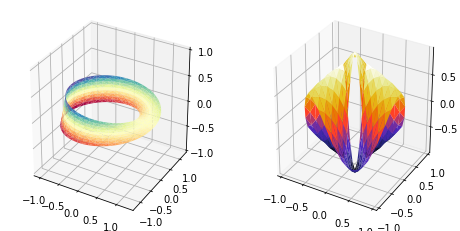

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure(figsize=plt.figaspect(0.5))

#============
# First plot
#============

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1)


#============
# Second plot
#============

# Make parameter spaces radii and angles.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

# Map radius, angle pairs to x, y, z points.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(3*angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = xmid**2 + ymid**2 < min_radius**2
triang.set_mask(mask)

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)


plt.show()

# Examine each plot separately

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

(-1.0, 1.0)

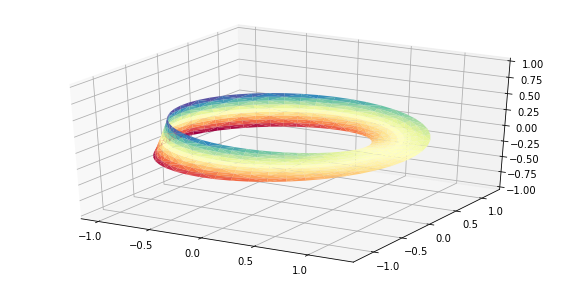

In [79]:
#============
# First plot
#============
# %matplotlib inline
# fig = plt.figure(figsize=plt.figaspect(0.5))
Fsz=5
fig = plt.figure(figsize=(2*Fsz,Fsz))

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.

# ax = fig.add_subplot(1, 2, 1, projection='3d')
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1)

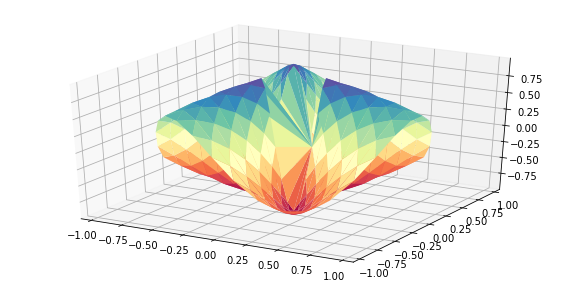

In [80]:
#============
# Second plot
#============

# Make parameter spaces radii and angles.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

# Map radius, angle pairs to x, y, z points.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(3*angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

Fsz=5
fig = plt.figure(figsize=(2*Fsz,Fsz))

# fig, ax = plt.subplots(subplot_kw =dict(projection="3d"))
# fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_trisurf(triang, z, cmap=plt.cm.Spectral)


# '''
# # Mask off unwanted triangles.
# xmid = x[triang.triangles].mean(axis=1)
# ymid = y[triang.triangles].mean(axis=1)
# mask = xmid**2 + ymid**2 < min_radius**2
# triang.set_mask(mask)

# # Plot the surface.
# ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)


# plt.show()
# '''

In [81]:
print(triang.triangles.shape)  #<- 538 triangles
print(x.shape)                 #<- 288 points on 2D plane
triang.triangles

(538, 3)
(288,)


array([[178, 171, 179],
       [179, 171, 180],
       [167, 166, 159],
       ...,
       [264, 232, 240],
       [ 64,  72, 264],
       [264,  24,  32]], dtype=int32)

# Show sufrace w/o and with MASKING

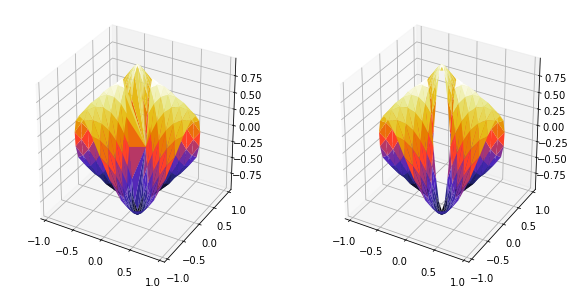

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D
# fig, ax = plt.subplots(subplot_kw =dict(projection="3d"))

Fsz=5
fig1 = plt.figure(figsize=(2*Fsz,Fsz))

ax1 = fig1.add_subplot(1, 2, 1, projection='3d')
ax1.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = xmid**2 + ymid**2 < min_radius**2
triang.set_mask(mask)

# Plot the surface.
ax2 = fig1.add_subplot(1, 2, 2, projection='3d')
ax2.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)

# ax.plot_trisurf(triang, z, cmap=plt.cm.Spectral)


### Stacking Plots Together - DO IT MANUALLY !
##### https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.08-Multiple-Subplots.ipynb#scrollTo=HYoNet0-ruX6


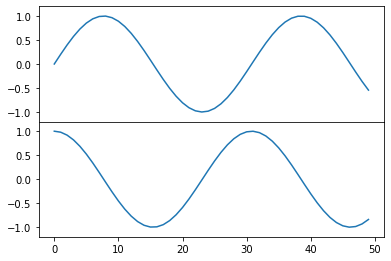

In [73]:
fig2 = plt.figure()
ax1 = fig2.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig2.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

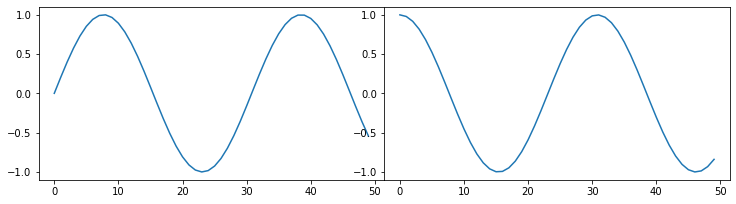

In [83]:
fig2 = plt.figure()
ax1 = fig2.add_axes([0.1, 0.1, 0.8, 0.6]) #,                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig2.add_axes([0.9, 0.1, .8, 0.6])#,                   ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## Creating a Triangulation for use in Matplotlib's plot_trisurf with matplotlib.tri.Triangulation
https://stackoverflow.com/questions/45243563/creating-a-triangulation-for-use-in-matplotlibs-plot-trisurf-with-matplotlib-tr

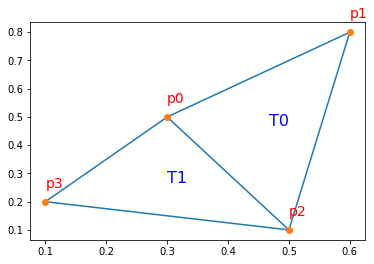

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

# we have a (4,2) array, specifying the point coordinates, having the x and y coordinates for each point in a row
xy = [[0.3,0.5],  # <---- pnt 0
      [0.6,0.8],  # <---  pnt 1
      [0.5,0.1],  # <---  pnt 2
      [0.1,0.2]]  # <---  pnt 3
xy = np.array(xy)

# We then create triangles from them by using the indices 
# of the points that should constitute the triangle in an anti-clockwise manner.
triangles = [[0,2,1],  # <--- T0
             [2,0,3]]  # <--- T1

triang = mtri.Triangulation(xy[:,0], xy[:,1], triangles=triangles)
plt.triplot(triang, marker="o")




# Add labels to the plot
style = dict(size=14, color='red')

delta = 0.05
plt.text( xy[0][0],  xy[0][1]+delta, "p0", **style)
plt.text( xy[1][0],  xy[1][1]+delta, "p1", **style)
plt.text( xy[2][0],  xy[2][1]+delta, "p2", **style)
plt.text( xy[3][0],  xy[3][1]+delta, "p3", **style)




# Add labels to triangles
style = dict(size=16, color='blue')

t0 = np.array([0.0,0.0])
for i in triangles[0]:
    t0[0] += xy[i][0]/3;     
    t0[1] += xy[i][1]/3

t1 = np.array([0.0,0.0])
for i in triangles[1]:
    t1[0] += xy[i][0]/3;     
    t1[1] += xy[i][1]/3
    
plt.text( t0[0],  t0[1], "T0", **style)
plt.text( t1[0],  t1[1], "T1", **style)

plt.show()

### We may then create a list of z values and plot the same in 3D

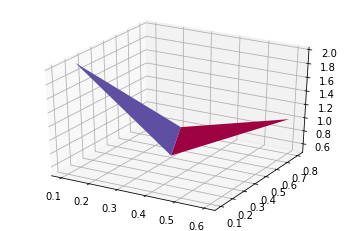

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D

xy = [[0.3,0.5],
      [0.6,0.8],
      [0.5,0.1],
      [0.1,0.2]]
xy = np.array(xy)

triangles = [[0,2,1],
             [2,0,3]]

triang = mtri.Triangulation(xy[:,0], xy[:,1], triangles=triangles)

z = np.array([0.1,0.2,0.3,0.4])*5

fig, ax = plt.subplots(subplot_kw =dict(projection="3d"))
# ax.plot_trisurf(triang, z,cmap=plt.cm.CMRmap)
ax.plot_trisurf(triang, z,cmap=plt.cm.Spectral)


plt.show()